<!-- ![image](https://i.ytimg.com/vi/TbEZIZo4PZ8/maxresdefault.jpg) -->

### Introduction to Classification - INSURANCE CLAIM ANALYSIS
Introduction to Logistic Regression

Sigmoid Function

Confusion Matrix

Classification Evaluation Metrics

https://www.kaggle.com/code/mohamedbakrey/make-a-prediction-for-insurance-claim-report

https://youtu.be/ntBa7YKc9XM?si=1V1RL0wCmxM_gjor  Regression price

https://youtu.be/OOLhKLXCJiU?si=dWxvFk82mVO8WxEP DBSCAN

# Predicting auto and insurance fraud in general:
is a contract, represented by a policy, in which an individual or entity receives financial protection or reimbursement against losses from an insurance company. The company pools clients' risks to make payments more affordable for the insured.
# Insurance Policy Components
When choosing a policy, it is important to understand how insurance works.

A firm understanding of these concepts goes a long way in helping you choose the policy that best suits your needs. For instance, whole life insurance may or may not be the right type of life insurance for you. There are three components of any type of insurance (premium, policy limit, and deductible) that are crucial.

> The goal of this note, Kuho Hwa, is to make a simplified and structured analysis to make an explanation of that dirty process called fraud and lack of it through analysis and the machine learning system.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

# Read data 

In [2]:
db=pd.read_csv('insurance_claims_report.csv')
#   

In [3]:
db.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17/10/14,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27/06/06,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,18,687698,06/09/00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25/05/90,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06/06/14,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12/10/06,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,04/06/00,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03/02/90,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,05/02/97,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25/07/11,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [4]:
db.shape

(1000, 39)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
db.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.937000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.158871,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,18.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
db.count()

months_as_customer             1000
age                            1000
policy_number                  1000
policy_bind_date               1000
policy_state                   1000
policy_csl                     1000
policy_deductable              1000
policy_annual_premium          1000
umbrella_limit                 1000
insured_zip                    1000
insured_sex                    1000
insured_education_level        1000
insured_occupation             1000
insured_hobbies                1000
insured_relationship           1000
capital-gains                  1000
capital-loss                   1000
incident_date                  1000
incident_type                  1000
collision_type                 1000
incident_severity              1000
authorities_contacted           909
incident_state                 1000
incident_city                  1000
incident_location              1000
incident_hour_of_the_day       1000
number_of_vehicles_involved    1000
property_damage             

In [8]:
pd.set_option('display.max_columns', 500)
db

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17/10/14,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25/01/15,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27/06/06,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21/01/15,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,18,687698,06/09/00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22/02/15,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25/05/90,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/01/15,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06/06/14,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17/02/15,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16/07/91,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22/02/15,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05/01/14,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24/01/15,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17/02/03,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23/01/15,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18/11/11,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26/02/15,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [9]:
db.transpose().iloc[:,:5]

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,18,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,17/10/14,27/06/06,06/09/00,25/05/90,06/06/14
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


In [10]:
db.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [11]:
db.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.893700e+01,9.158871e+00,18.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


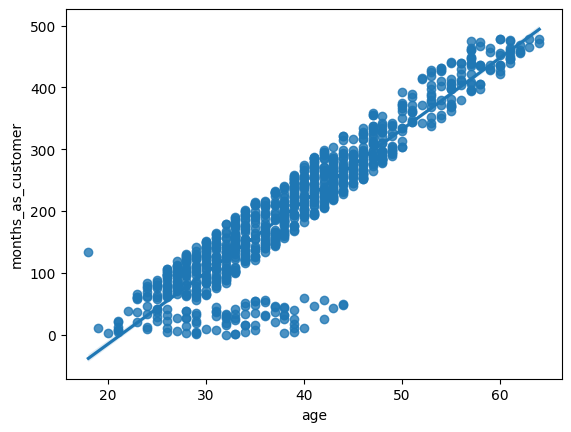

In [12]:
ax=sns.regplot(x='age',y='months_as_customer',data=db)

age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    34
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
53    13
50    13
61    10
24    10
54    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
18     1
19     1
20     1
22     1
Name: count, dtype: int64


<Axes: xlabel='age'>

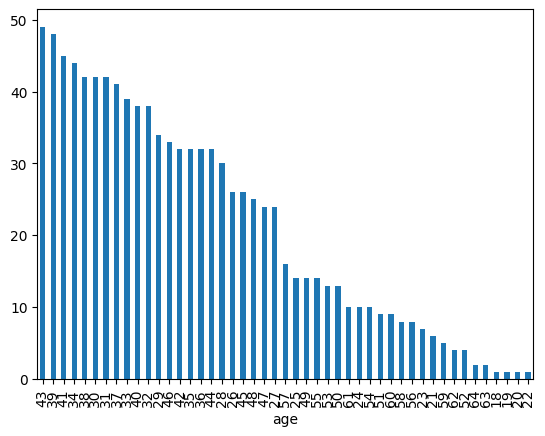

In [13]:
p = db['age'].value_counts()
print(p)
db['age'].value_counts().plot.bar()

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


<Axes: xlabel='months_as_customer'>

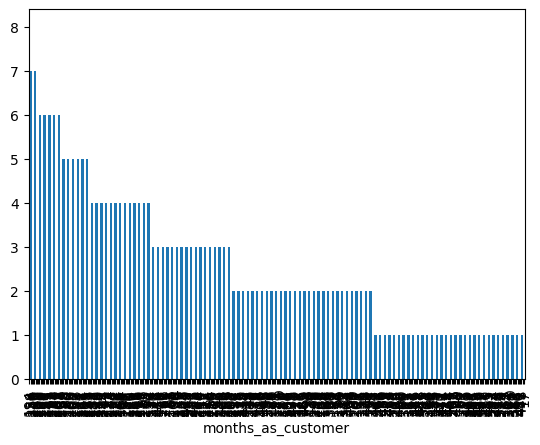

In [14]:
p = db['months_as_customer'].value_counts()
print(p)
db['months_as_customer'].value_counts().plot.bar()

<Axes: xlabel='age', ylabel='count'>

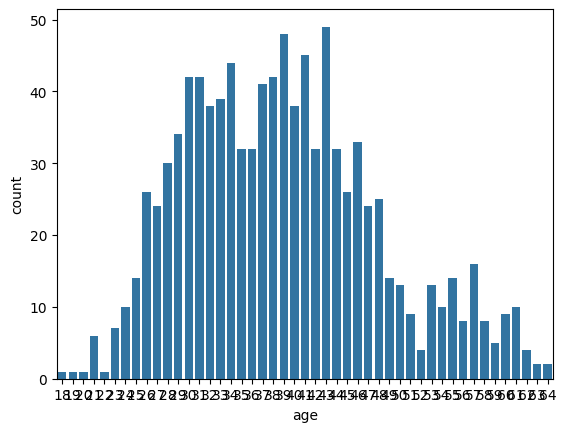

In [15]:
sns.countplot(data=db, x='age')

Text(0.5, 0, 'age')

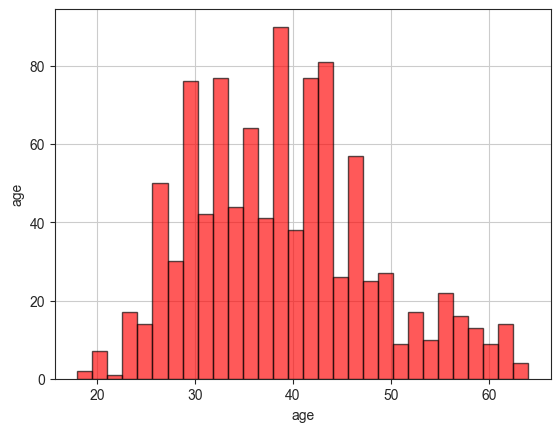

In [16]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
db['age'].hist(bins=30, color = "red", edgecolor='black', alpha=0.65, lw=1.5)
plt.ylabel('age')
plt.xlabel('age')


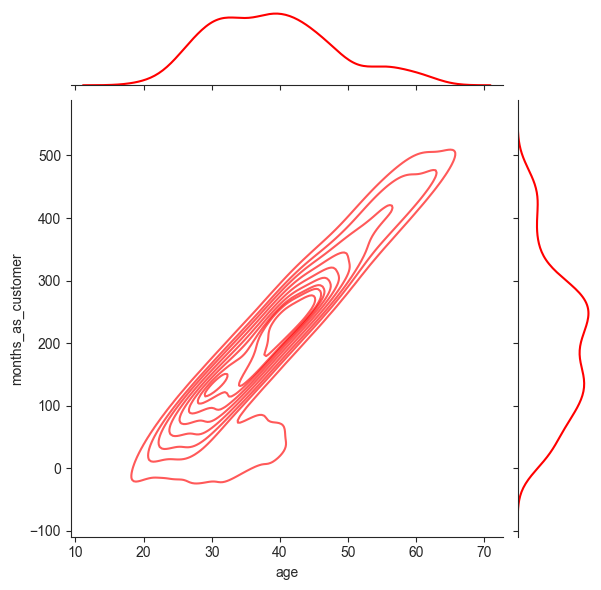

In [17]:
sns.jointplot(x = 'age', y = 'months_as_customer',
              data = db, kind = 'kde', color = "red", alpha = 0.65)

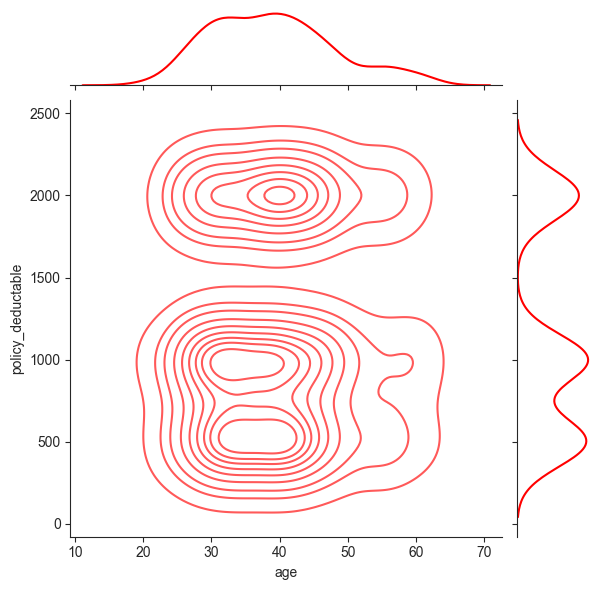

In [18]:
sns.jointplot(x = 'age', y = 'policy_deductable',
              data = db, kind = 'kde', color = "red", alpha = 0.65)

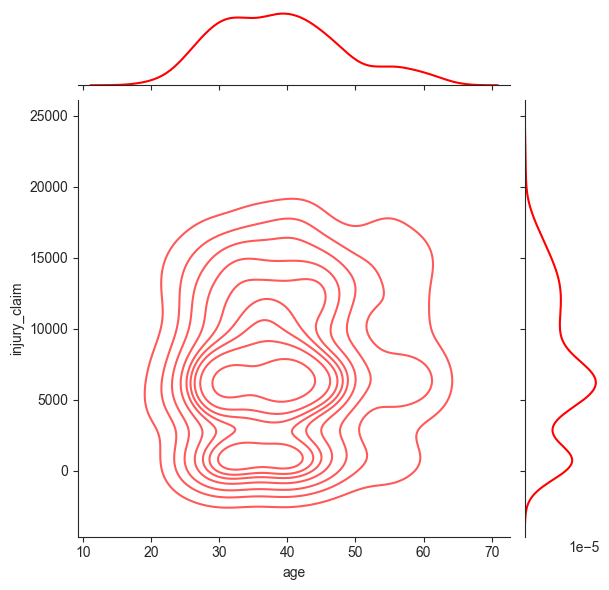

In [19]:

sns.jointplot(x = 'age', y = 'injury_claim',
              data = db, kind = 'kde', color = "red", alpha = 0.65)

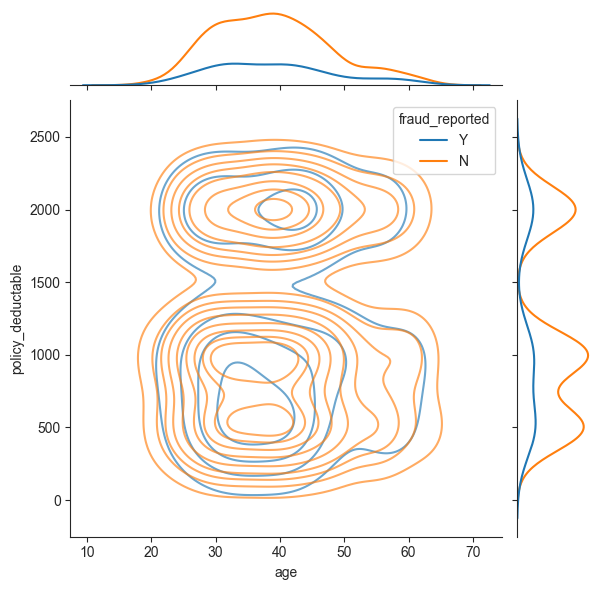

In [20]:
sns.jointplot(x = 'age', y ='policy_deductable', 
              data = db,hue = 'fraud_reported',kind = 'kde', color = "red", alpha = 0.65)

In [21]:
# sns.pairplot(db, hue = 'fraud_reported', palette = 'cool_r')


- Before apply models , we need to check the data quality and data preprocessing. 
    - We need to check the data for missing values, outliers, and data types.
    - We need to handle missing values by either removing them or imputing them with a suitable
    method.
    - We need to transform the data into a suitable format for modeling, such as scaling or encoding
    categorical variables.
    - We need to split the data into training and testing sets to evaluate the model's performance.

# Let's apply our classification models one by one:
1) Logistic Regression:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [23]:
db.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [24]:
X = db[['months_as_customer', 'age', 'policy_annual_premium',
       'insured_education_level', 'auto_year', 'fraud_reported', 'property_damage',
       'umbrella_limit', 'incident_hour_of_the_day', 'incident_severity', 'authorities_contacted']]
y = db['fraud_reported']

In [25]:
# if use only numerical columns for training
X = db[["months_as_customer","age","policy_annual_premium","auto_year" ,"umbrella_limit"]]

In [26]:
X

,months_as_customer,age,policy_annual_premium,auto_year,umbrella_limit
0,328,48,1406.91,2004,0
1,228,42,1197.22,2007,5000000
2,134,18,1413.14,2007,5000000
3,256,41,1415.74,2014,6000000
4,228,44,1583.91,2009,6000000
...,...,...,...,...,...
995,3,38,1310.80,2006,0
996,285,41,1436.79,2015,0
997,130,34,1383.49,1996,3000000
998,458,62,1356.92,1998,5000000


In [27]:
db.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [28]:
X # encodiing and remove null values

,months_as_customer,age,policy_annual_premium,auto_year,umbrella_limit
0,328,48,1406.91,2004,0
1,228,42,1197.22,2007,5000000
2,134,18,1413.14,2007,5000000
3,256,41,1415.74,2014,6000000
4,228,44,1583.91,2009,6000000
...,...,...,...,...,...
995,3,38,1310.80,2006,0
996,285,41,1436.79,2015,0
997,130,34,1383.49,1996,3000000
998,458,62,1356.92,1998,5000000


In [29]:
# prompt: Using dataframe X: change object data types into numerical encoder 

from sklearn.preprocessing import OrdinalEncoder

# Select object columns
object_cols = X.select_dtypes(include='object').columns

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Apply encoding to selected columns
X[object_cols] = encoder.fit_transform(X[object_cols])
X.isnull().sum()

months_as_customer       0
age                      0
policy_annual_premium    0
auto_year                0
umbrella_limit           0
dtype: int64

In [30]:
# Replace NaN values with the mean of each column
X = X.fillna(X.mean())

# Verify that there are no more missing values
print(X.isnull().sum())

months_as_customer       0
age                      0
policy_annual_premium    0
auto_year                0
umbrella_limit           0
dtype: int64


In [31]:
X

,months_as_customer,age,policy_annual_premium,auto_year,umbrella_limit
0,328,48,1406.91,2004,0
1,228,42,1197.22,2007,5000000
2,134,18,1413.14,2007,5000000
3,256,41,1415.74,2014,6000000
4,228,44,1583.91,2009,6000000
...,...,...,...,...,...
995,3,38,1310.80,2006,0
996,285,41,1436.79,2015,0
997,130,34,1383.49,1996,3000000
998,458,62,1356.92,1998,5000000


In [32]:
X.shape

(1000, 5)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
X_train.shape

(700, 5)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [37]:
# classifications
    # SVM 
    # decision tree
    # KNN
    # Random Forest
    # Naive bayes
    #Ensamble technique

# Regression Model
    # SVM 
    # decision tree
    # Random Forest
    #Ensamble technique

In [38]:

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
y_pred = pipe.predict(X_test)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7333333333333333
[[220   0]
 [ 80   0]]
              precision    recall  f1-score   support

           N       0.73      1.00      0.85       220
           Y       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



c:\Users\hp\.conda\envs\aienv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\.conda\envs\aienv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\.conda\envs\aienv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
# if use only numerical columns for training
x = db[["months_as_customer","age","policy_annual_premium","auto_year" ,"umbrella_limit"]]
len(x)

1000

In [78]:
x.shape

(1000, 5)

In [79]:
x

,months_as_customer,age,policy_annual_premium,auto_year,umbrella_limit
0,328,48,1406.91,2004,0
1,228,42,1197.22,2007,5000000
2,134,18,1413.14,2007,5000000
3,256,41,1415.74,2014,6000000
4,228,44,1583.91,2009,6000000
...,...,...,...,...,...
995,3,38,1310.80,2006,0
996,285,41,1436.79,2015,0
997,130,34,1383.49,1996,3000000
998,458,62,1356.92,1998,5000000


In [75]:
y = db["fraud_reported"]
len(y)

1000

In [80]:
y

0    Y
1    Y
2    N
3    Y
4    N
5    Y
Name: fraud_reported, dtype: object

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("insurance_claims_report.csv")
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Sample data creation - REPLACE THIS with your full CSV file loading
# data = {
#     "months_as_customer": [328, 228, 134, 256, 228, 256],
#     "age": [48, 42, 18, 41, 44, 39],
#     "policy_annual_premium": [1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.10],
#     "auto_year": [2004, 2007, 2007, 2014, 2009, 2003],
#     "umbrella_limit": [0, 5000000, 5000000, 6000000, 6000000, 0],
#     "fraud_reported": ['Y', 'Y', 'N', 'Y', 'N', 'Y']
# }
# df = pd.DataFrame(data)

# Features and target
X = df[["months_as_customer", "age", "policy_annual_premium", "auto_year", "umbrella_limit"]]
y = df["fraud_reported"]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Y -> 1, N -> 0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Neural Network (MLP)": MLPClassifier(max_iter=500)
}

# Train & evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"{name}:\nAccuracy = {acc:.2f}")
    print("=======================")

c:\Users\hp\.conda\envs\aienv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
 Accuracy = 0.73
K-Nearest Neighbors:
 Accuracy = 0.68
Decision Tree:
 Accuracy = 0.61
Random Forest:
 Accuracy = 0.70
Gradient Boosting:
 Accuracy = 0.71
Support Vector Machine:
 Accuracy = 0.73
Naive Bayes:
 Accuracy = 0.67
Neural Network (MLP):
 Accuracy = 0.73


In [40]:
import pickle
filename = 'logistic_model.pkl'

pickle.dump(pipe, open(filename, 'wb'))

## Stream_lit code

In [41]:
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
filename = 'logistic_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

st.title("Insurance Claim Fraud Prediction")

st.write("""
This app predicts whether an insurance claim is fraudulent based on several factors.
""")

# Define input fields for numerical features
months_as_customer      = st.number_input('Months as Customer', min_value=0, max_value=500, value=100)
age                     = st.number_input('Age', min_value=18, max_value=100, value=30)
policy_annual_premium   = st.number_input('Policy Annual Premium', min_value=0.0, max_value=2500.0, value=1000.0)
auto_year               = st.number_input('Auto Year', min_value=1980, max_value=2023, value=2010)
umbrella_limit          = st.number_input('Umbrella Limit', min_value=-10000000, max_value=10000000, value=0)


# Create a button to make a prediction
if st.button('Predict Fraud'):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame({
        'months_as_customer': [months_as_customer],
        'age': [age],
        'policy_annual_premium': [policy_annual_premium],
        'auto_year': [auto_year],
        'umbrella_limit': [umbrella_limit]
      })

    # Select only the numerical columns used for prediction based on the original code
    numerical_cols_for_prediction = ['months_as_customer', 'age', 'policy_annual_premium', 'auto_year', 'umbrella_limit']
    input_data_for_prediction = input_data[numerical_cols_for_prediction]

    # Make the prediction
    prediction = loaded_model.predict(input_data_for_prediction)

    # Display the prediction
    if prediction[0] == 'Y':
        st.write("Prediction: Fraud Reported (Y)")
    else:
        st.write("Prediction: No Fraud Reported (N)")



2025-06-19 12:55:46.223 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 12:55:47.227 
  command:

    streamlit run C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-19 12:55:47.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 12:55:47.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 12:55:47.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 12:55:47.232 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 12:55:47.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 12:55:47.235 Thread 

In [42]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Here I use dummy data for demonstration All Classifications purposes.

In [43]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
predictions1 = lr.predict(X_test)

In [47]:
print(classification_report(y_test,predictions1))
print('\n')
print(confusion_matrix(y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



[[15  0]
 [ 0 10]]


In [48]:
from sklearn.metrics import accuracy_score
acclr = accuracy_score(y_test,predictions1)*100
acclr

100.0

# Naïve Bayes:

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [50]:
gnb

GaussianNB()

In [51]:
predictions2 = gnb.predict(X_test)
print(classification_report(y_test,predictions2))
print('\n')
print(confusion_matrix(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



[[14  1]
 [ 1  9]]


In [52]:
from sklearn.metrics import accuracy_score
accgnb = accuracy_score(y_test,predictions2)*100
accgnb

92.0

# Stochastic Gradient Descent:

In [53]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
sgd

SGDClassifier()

In [54]:
predictions3 = sgd.predict(X_test)
print(classification_report(y_test,predictions3))
print('\n')
print(confusion_matrix(y_test,predictions3))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.91      1.00      0.95        10

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



[[14  1]
 [ 0 10]]


# K-Nearest Neighbours:

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [56]:
predictions4 = knn.predict(X_test)
print(classification_report(y_test,predictions4))
print('\n')
print(confusion_matrix(y_test,predictions4))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.77      1.00      0.87        10

    accuracy                           0.88        25
   macro avg       0.88      0.90      0.88        25
weighted avg       0.91      0.88      0.88        25



[[12  3]
 [ 0 10]]


In [57]:
from sklearn.metrics import accuracy_score
accknn = accuracy_score(y_test,predictions4)*100
accknn

88.0

# Descision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
predictions5 = dtree.predict(X_test)
print(classification_report(y_test,predictions5))
print('\n')
print(confusion_matrix(y_test,predictions5))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



[[13  2]
 [ 0 10]]


In [60]:
from sklearn.metrics import accuracy_score
accdtree = accuracy_score(y_test,predictions5)*100
accdtree

92.0

# Random Forest:

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [62]:
predictions6 = rfc.predict(X_test)
print(classification_report(y_test,predictions6))
print('\n')
print(confusion_matrix(y_test,predictions6))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.82      0.90      0.86        10

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



[[13  2]
 [ 1  9]]


In [63]:
from sklearn.metrics import accuracy_score
accrfc = accuracy_score(y_test,predictions6)*100
accrfc

88.0

#  Support Vector Machine:

In [64]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [65]:
predictions7 = svc_model.predict(X_test)
print(classification_report(y_test,predictions7))
print('\n')
print(confusion_matrix(y_test,predictions7))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



[[13  2]
 [ 0 10]]


In [66]:
from sklearn.metrics import accuracy_score
accSVM = accuracy_score(y_test,predictions7)*100
accSVM

92.0

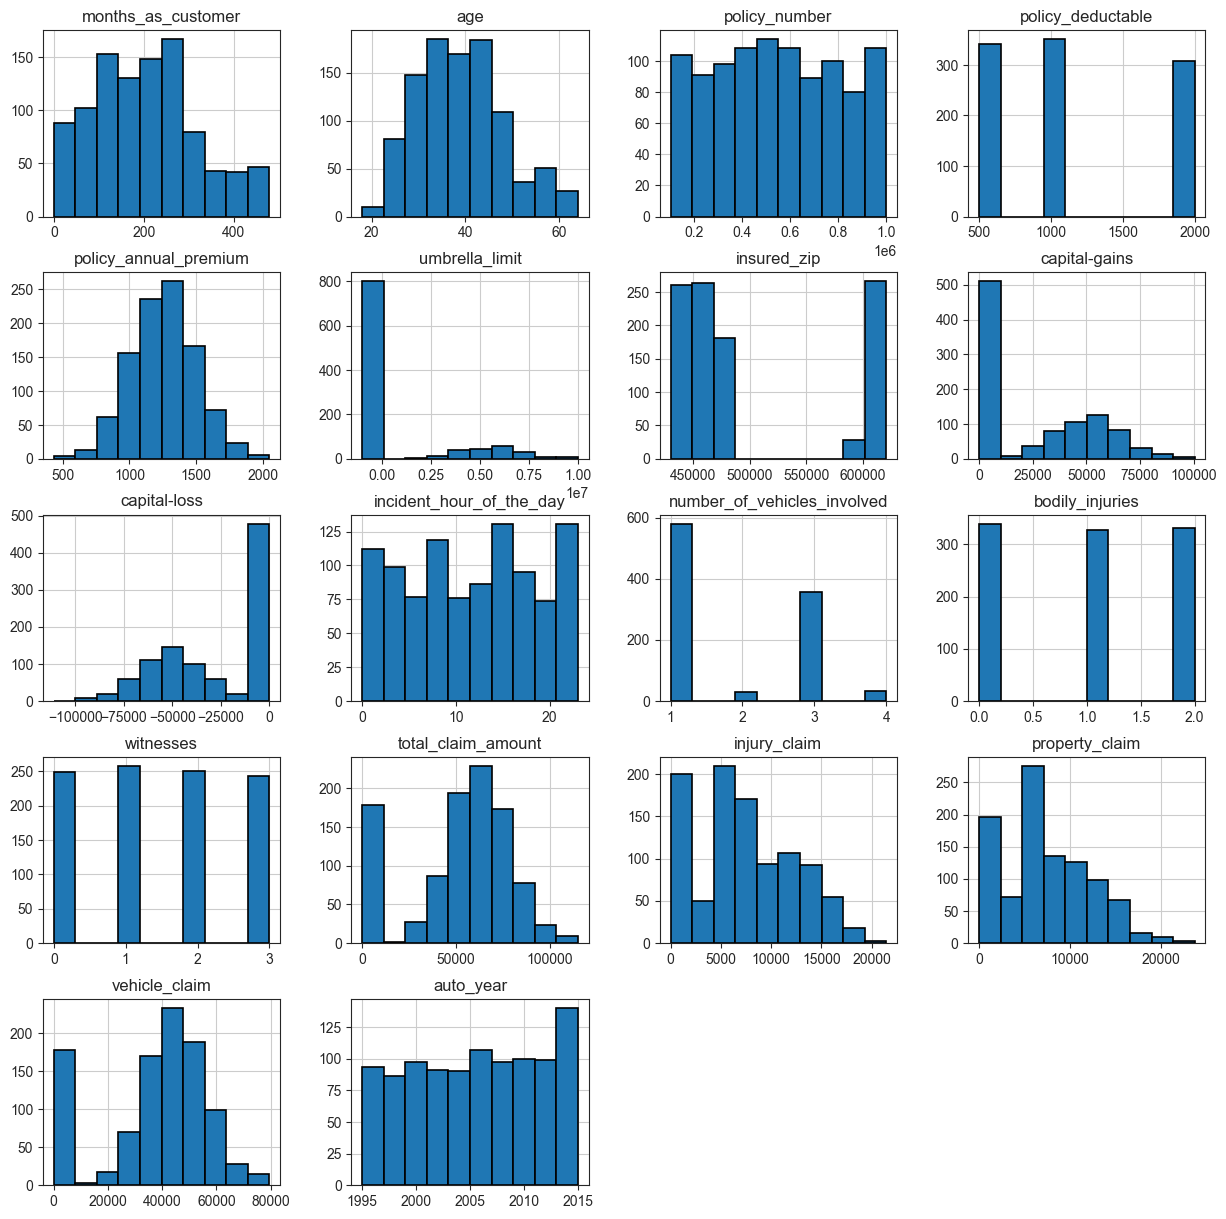

In [67]:
db.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<Axes: xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

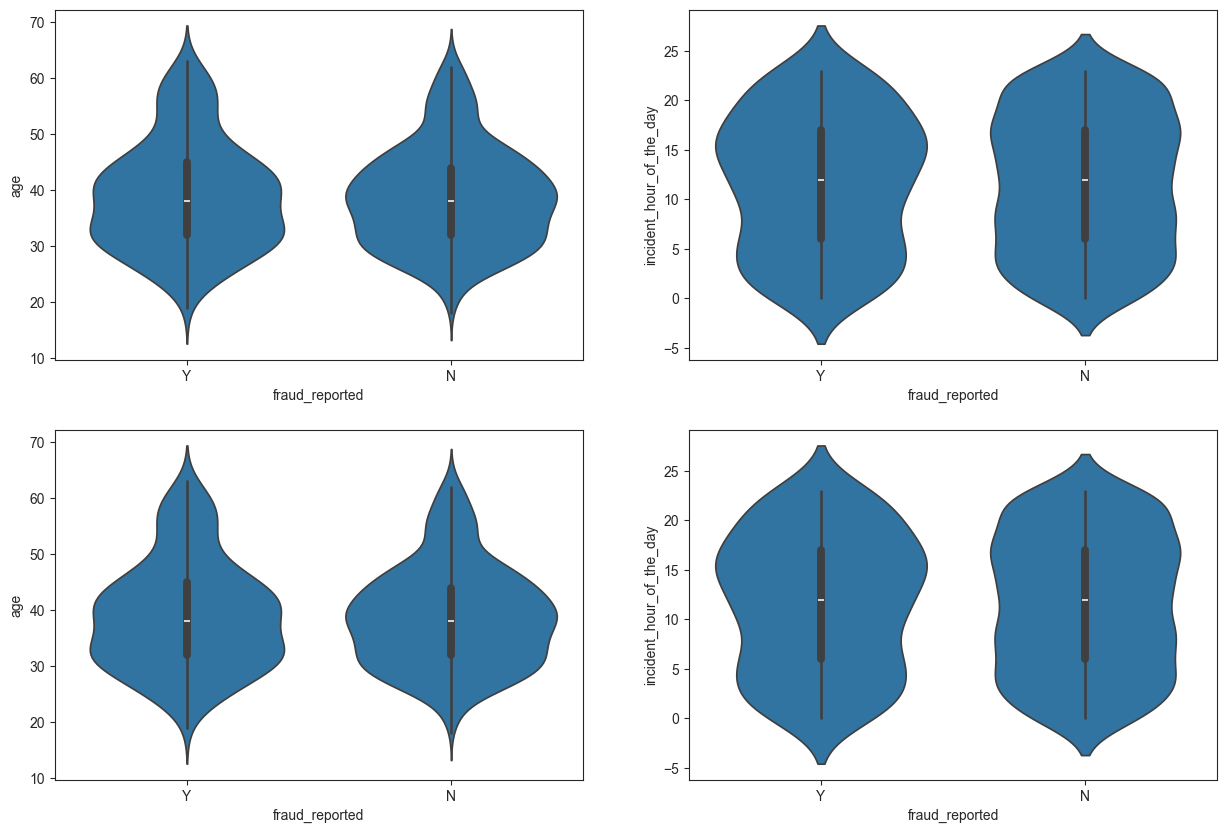

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='fraud_reported',y='age',data=db)
plt.subplot(2,2,2)
sns.violinplot(x='fraud_reported',y='incident_hour_of_the_day',data=db)
plt.subplot(2,2,3)
sns.violinplot(x='fraud_reported',y='age',data=db)
plt.subplot(2,2,4)
sns.violinplot(x='fraud_reported',y='incident_hour_of_the_day',data=db)